In [1]:
from apts import *
%matplotlib inline  

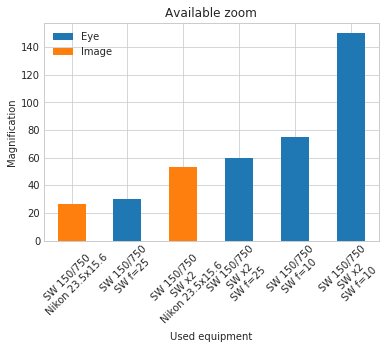

In [2]:
e = Equipment()

sky_watcher = "SW"

e.register(equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(equipment.Eyepiece(25, sky_watcher))
e.register(equipment.Eyepiece(10, sky_watcher))
#e.register(equipment.Eyepiece(6, sky_watcher))

e.plot_zoom()

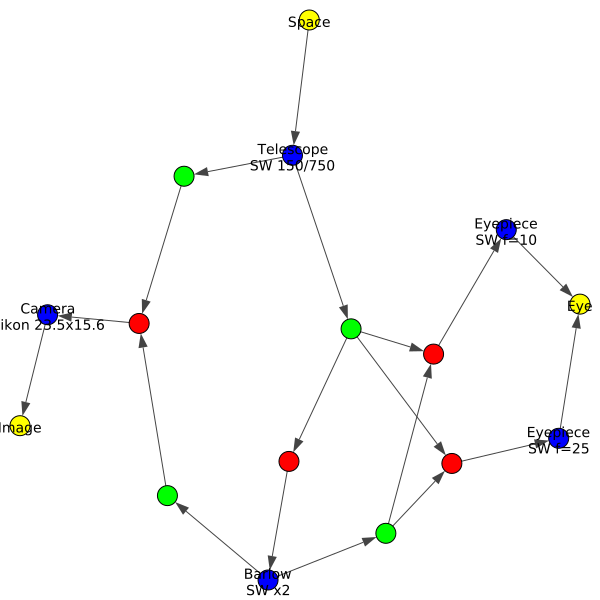

In [3]:
e.plot_connection_garph()

In [4]:
data = e.data()
data[data.useful_zoom == True].sort_values(['fov'], ascending=[0])

,label,type,zoom,useful_zoom,fov,range,brightness,elements
2,"SW 150/750, SW f=25",Eye,30.00000,True,1.733333,12.880456,51.020408,2
5,"SW 150/750, Nikon 23.5x15.6",Image,26.58956,True,1.191840,12.880456,64.947755,2
0,"SW 150/750, SW x2, SW f=25",Eye,60.00000,True,0.866667,12.880456,12.755102,3
3,"SW 150/750, SW f=10",Eye,75.00000,True,0.693333,12.880456,8.163265,2
4,"SW 150/750, SW x2, Nikon 23.5x15.6",Image,53.17912,True,0.595920,12.880456,16.236939,3
1,"SW 150/750, SW x2, SW f=10",Eye,150.00000,True,0.346667,12.880456,2.040816,3


In [5]:
observations.Conditions.MIN_TEMPERATURE = -10

place = Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = Observation(place,e)

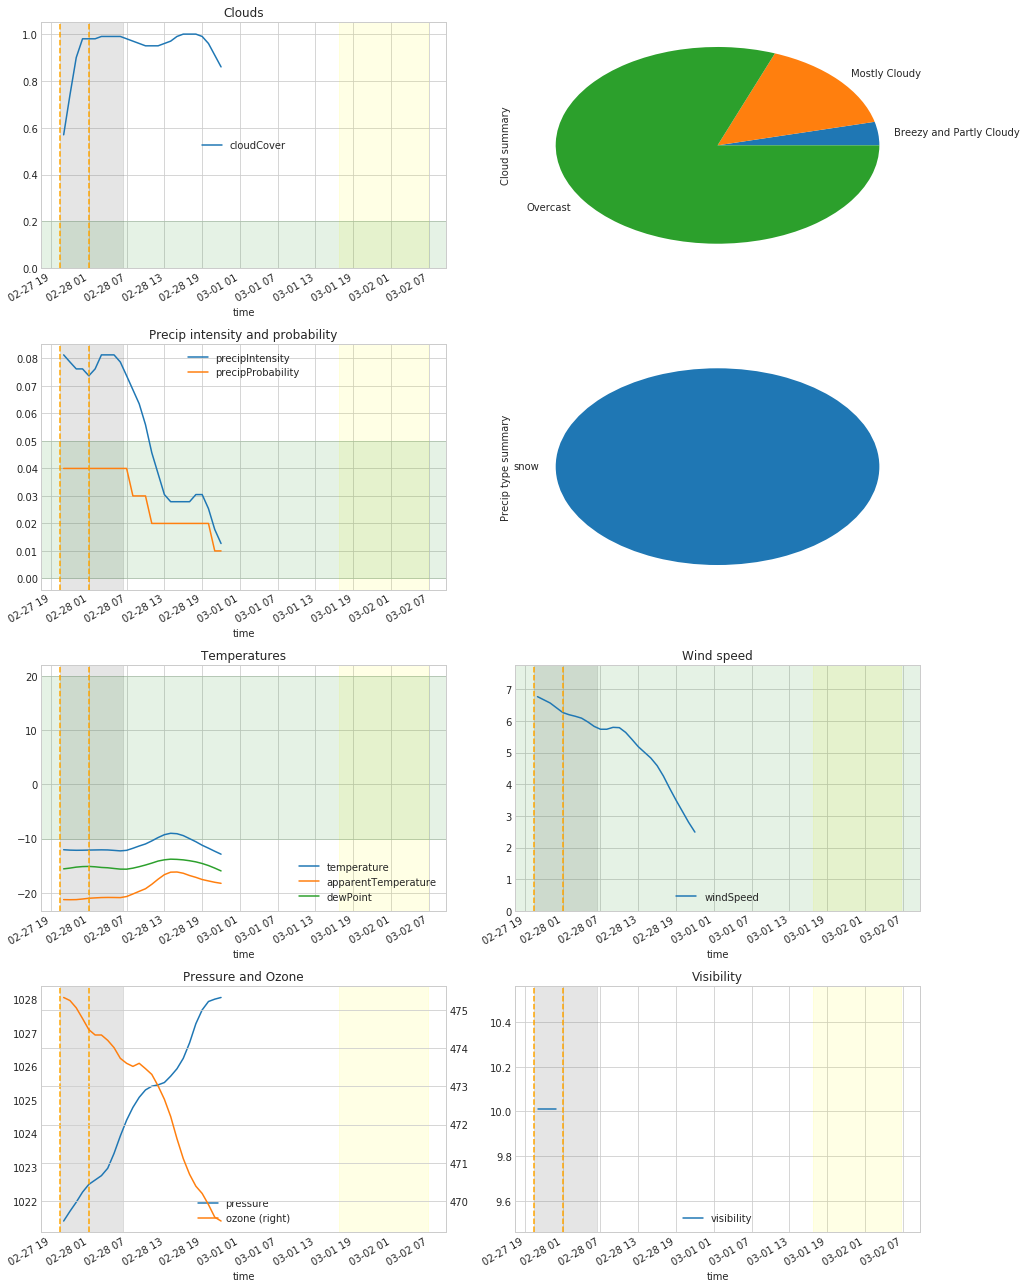

In [6]:
o.plot_weather()

In [7]:
o.weather_is_good()

False

In [8]:
#n = Notify('lpozarlik@gmail.com')
#n.send(o)

In [9]:
o.local_planets.objects

,Name,Transit,Altitude,Magnitude,RA,Dec,Distance,Phase
0,"<Mercury ""Mercury"" at 0x7fa6a3dce668>",2018-03-01 12:32:42.923524+01:00,35.636498,-1.19,23.479202,-4.221816,1.253320,92.112572
1,"<Venus ""Venus"" at 0x7fa6a3dce7f0>",2018-03-01 12:40:55.497372+01:00,35.885428,-3.79,23.616403,-3.972683,1.661765,97.806244
2,"<Mars ""Mars"" at 0x7fa6a3dce978>",2018-03-01 06:23:13.152396+01:00,17.077968,0.81,17.304072,-22.809832,1.399802,89.174347
3,"<ephem.Jupiter ""Jupiter"" at 0x7fa6a2e12760>",2018-03-01 04:29:26.665227+01:00,22.468799,-2.01,15.402634,-17.405732,5.043674,99.233925
4,"<ephem.Saturn ""Saturn"" at 0x7fa6a2e128d0>",2018-03-01 07:36:30.585778+01:00,17.528738,0.56,18.528926,-22.357651,10.471801,99.806328
5,"<Uranus ""Uranus"" at 0x7fa6a3dceb00>",2018-02-28 14:44:23.686827+01:00,49.352461,5.88,1.614158,9.502649,20.571899,99.967934
6,"<Neptune ""Neptune"" at 0x7fa6a3dcec88>",2018-03-01 12:05:47.596220+01:00,32.659827,7.96,23.029272,-7.201106,30.932949,99.999916


In [10]:
o.get_visible_planets()

,Name,Transit,Altitude,Magnitude,RA,Dec,Distance,Phase


In [11]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude
47,M48,-,NGC 2548,Open Cluster,Hydra,5.5,1500,8.230000,-5.800000,54.0,54.0,2018-02-27 21:25:05.656526+01:00,34.000764
43,M44,Beehive Cluster (Praesepe),NGC 2632,Open Cluster,Cancer,3.7,577,8.668333,19.983333,95.0,95.0,2018-02-27 21:51:28.032249+01:00,59.761942
66,M67,-,NGC 2682,Open Cluster,Cancer,6.1,2700,8.840000,11.816667,30.0,30.0,2018-02-27 22:01:41.389228+01:00,51.594860
80,M81,Bode's Galaxy,NGC 3031,Spiral Galaxy,Ursa Major,6.9,12000000,9.926667,69.066667,21.0,10.0,2018-02-27 23:07:12.559573+01:00,71.189204
81,M82,Cigar Galaxy,NGC 3034,Irregular Galaxy,Ursa Major,8.4,12000000,9.930000,69.683333,9.0,4.0,2018-02-27 23:07:25.609457+01:00,70.572759
65,M66,-,NGC 3627,Spiral Galaxy,Leo,8.9,35000000,11.336667,12.983333,8.0,2.5,2018-02-28 00:31:02.159259+01:00,52.730614


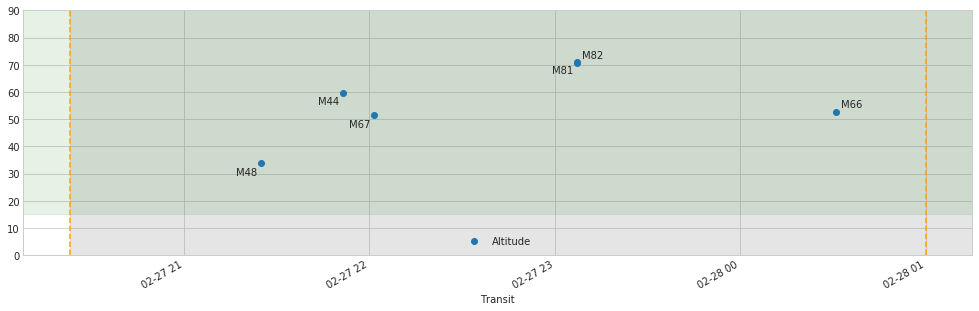

In [12]:
o.plot_messier()

In [13]:
#o.get_visible_messier().to_html('/tmp/list.html')

In [14]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)